# Startup Success Prediction Model

## Problem Statement

**Startup** is a business that has just been established and grown supported by digital services and has also become an important element of innovation systems and economies around the world. The **Startup** ecosystem is growing very rapidly and still needs a lot of funding to operate with a minimalist working group. So it is very important for VC to monitor the performance and performance of **Startup**, so that it can be used as a consideration to decide whether to fund a Startup to drive its growth or refuse to take part in funding. To monitor startup performance, it is important to analyze what makes a Startup successful and how to determine its success.

## Goals
The goal to be achieved is to determine whether a StartUp will be successful or not.

## Objective
The objective is to analyze startup behavior based on several variables, determine what variables affect startup success the most, then build a model that can predict the success of a StartUp.

# Data Exploration

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# plt.style.use('seaborn')
sns.set_theme()


## Load Dataset

In [3]:
df = pd.read_csv('startup data.csv')

In [4]:
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


## Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

## Data type identification

In [6]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

## Data numeric

In [7]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


## Data categorical

In [8]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)
df['status']

0      acquired
1      acquired
2      acquired
3      acquired
4        closed
5        closed
6      acquired
7      acquired
8      acquired
9      acquired
10     acquired
11       closed
12       closed
13     acquired
14     acquired
15       closed
16       closed
17     acquired
18     acquired
19       closed
20     acquired
21       closed
22       closed
23       closed
24       closed
25     acquired
26     acquired
27     acquired
28     acquired
29     acquired
30       closed
31     acquired
32       closed
33     acquired
34       closed
35       closed
36       closed
37       closed
38     acquired
39     acquired
40     acquired
41     acquired
42       closed
43     acquired
44     acquired
45     acquired
46     acquired
47     acquired
48     acquired
49     acquired
50     acquired
51     acquired
52     acquired
53     acquired
54     acquired
55       closed
56     acquired
57     acquired
58     acquired
59     acquired
60       closed
61       closed
62     a

### Changing 'status' data value

In [9]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

### Handling 'status' data type to int 

In [10]:
#Tipe data status diganti dari object ke int
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

### Drop column labels

In [11]:
#labels dan status check similarity
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [12]:
#drop feature
df.drop(["labels"], axis=1, inplace=True)

# Exploratory Data Analysis

## Numerical Approach

### Statistical Summary

In [13]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [14]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


- Does the value listed on each column make sense?
- age_first_funding_year and age_last_funding_year have the same min,max data, need to be checked again 
- Is the maximum/minimum value still within the reasonable limit? 
- Min/max that is too far from the mean/median may be an indication of data input error 
- Is there a column with a significant difference between the mean and the median?
- Differences between mean/median indicate outlier or skewed distribution

### Categorical Value Counting

In [15]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status'] 
for col in cats:
    print(f'''Value count column {col}:''')
    print(df[col].value_counts())
    print()

Value count column state_code:
state_code
CA    488
NY    106
MA     83
WA     42
TX     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
CT      4
DC      4
UT      3
TN      3
RI      3
MI      3
KY      2
ME      2
NH      2
MO      2
IN      2
NV      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64

Value count column zip_code:
zip_code
94107             30
94105             23
95054             20
94103             19
94043             18
94025             16
94041             16
94110             15
10011             14
94301             13
10003             13
98104             12
78701             12
94404             11
94104             11
94306             11
10013             11
1803              11
94111             11
94085             10
10010             10
2451              10
10001             10
94040              9
10016              9
94063             

## Missing Value 

In [16]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


- **Analysis results in the dataset used there are Missing Values among them are**
    - **Total Missing Values i.e. 1386**
    - **Columns that have more than 50% of missing values**
        - Variable 'closed_at' with a total percentage of 63.70% or a total of 588 columns.
        - Variable 'Unnamed: 6' with a total percentage of 53.41% or a total of 493 columns.
    - **Columns that have less than 50% of missing values** 
        - Variable 'age_first_milestone_year' with a total percentage of 16.46% or a total of 152 columns.
        - Variable 'age_last_milestone_year' with a total percentage of 16.46% or a total of 152 columns.

In [17]:
# Checking Missing Values Column 
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


- **Analysis results in the column contained Missing Values among them are** 
    - **Column "Unnamed: 6"** is a column of information from a combination of several tables including 
        - Column "city", "state_code", and "zip_code" 
    - **Column "closed_at"** is a column where StartUp **"Closed"** so that the empty data should be a StarUp whose status is still **"Acquired"** 
    - **Column age_first_milestone_year** is information on when milestones were first performed in units of the year 
        - This column has a total of 771 rows of data with a Mean of 3.055353 and a median of 2.520500 showing abnormal data distribution 
    - **Column age_Last_milestone_year** is information when the last milestone was done in units of years 
        - This column has a total of 771 rows of data with a Mean of 4.754423 and a median of 4.476700 that shows the distribution of data is abnormal

###  Handling Missing Value Unnamed: 6

Based on the results of the analysis obtained that the column **Unnamed: 6** is a combination of several other columns including columns **city, state_code, and zip_code**, then we decided that remove the contents of the column **Unnamed: 6** first and then fill in the data based on a combination of several related columns.

In [18]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [19]:
# Total Missing Values kolom "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values column "Unnamed: 6": ', totalNull)

Total Missing Values column "Unnamed: 6":  0


### Handling Missing Value closed_at

In [20]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [21]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


### Handling Missing Value age_first_milestone_year and age_last_milestone_year

In [22]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()
# df[df['milestones']==0][["age_first_milestone_year",'age_last_milestone_year','milestones']]

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


Based on the results of the analysis obtained that the columns 'age_first_milestone_year' and 'age_last_milestone_year' have null values because the startup does not have milestones. this can be confirmed by looking at the 'milestones' column containing the data 0 must be accompanied by the null 'age_first_milestone_year' and 'age_last_milestone_year' columns. so we decided to fill that null column with a value of 0.

In [23]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

### Handling Missing Value state_code.1

- the **"state_code"** column and the **"state_code.1"** column must be the same, so the **"state_code.1"** column must be dropped. 
- column **"state_code.1"** has missing value in line 515.

In [24]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [25]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [26]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


## Graphic Approach

### Correlation heatmap

Now how to correlate between data variables. 

Correlation is represented as a value between -1 and +1 where +1 indicates the highest positive correlation, -1 indicates the highest negative correlation, and 0 indicates no correlation.

In [27]:
# df.corr()
# i want the correlation between all the columns which are number
numerical_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_col.append(column)
print(numerical_col)
print(len(numerical_col))        
df[numerical_col].corr()






['Unnamed: 0', 'latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']
33


,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,-0.000338,0.017708,-0.016420,-0.295894,-0.122905,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,-0.032863,-0.123909,-0.156038,0.175672,0.127427,0.083657,0.064852,0.071892,0.004819,-0.181104,0.006833,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260
is_CA,-0.042446,-0.417471,-0.780122,-0.010800,0.006190,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,-0.332216,-0.230759,-0.562953,-0.039258,0.024052,-0.020809,-0.028279,0.002489,0.042951,-0.056024,0.023742,-0.022224,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217


In [28]:

df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

32


(32.5, -0.5)

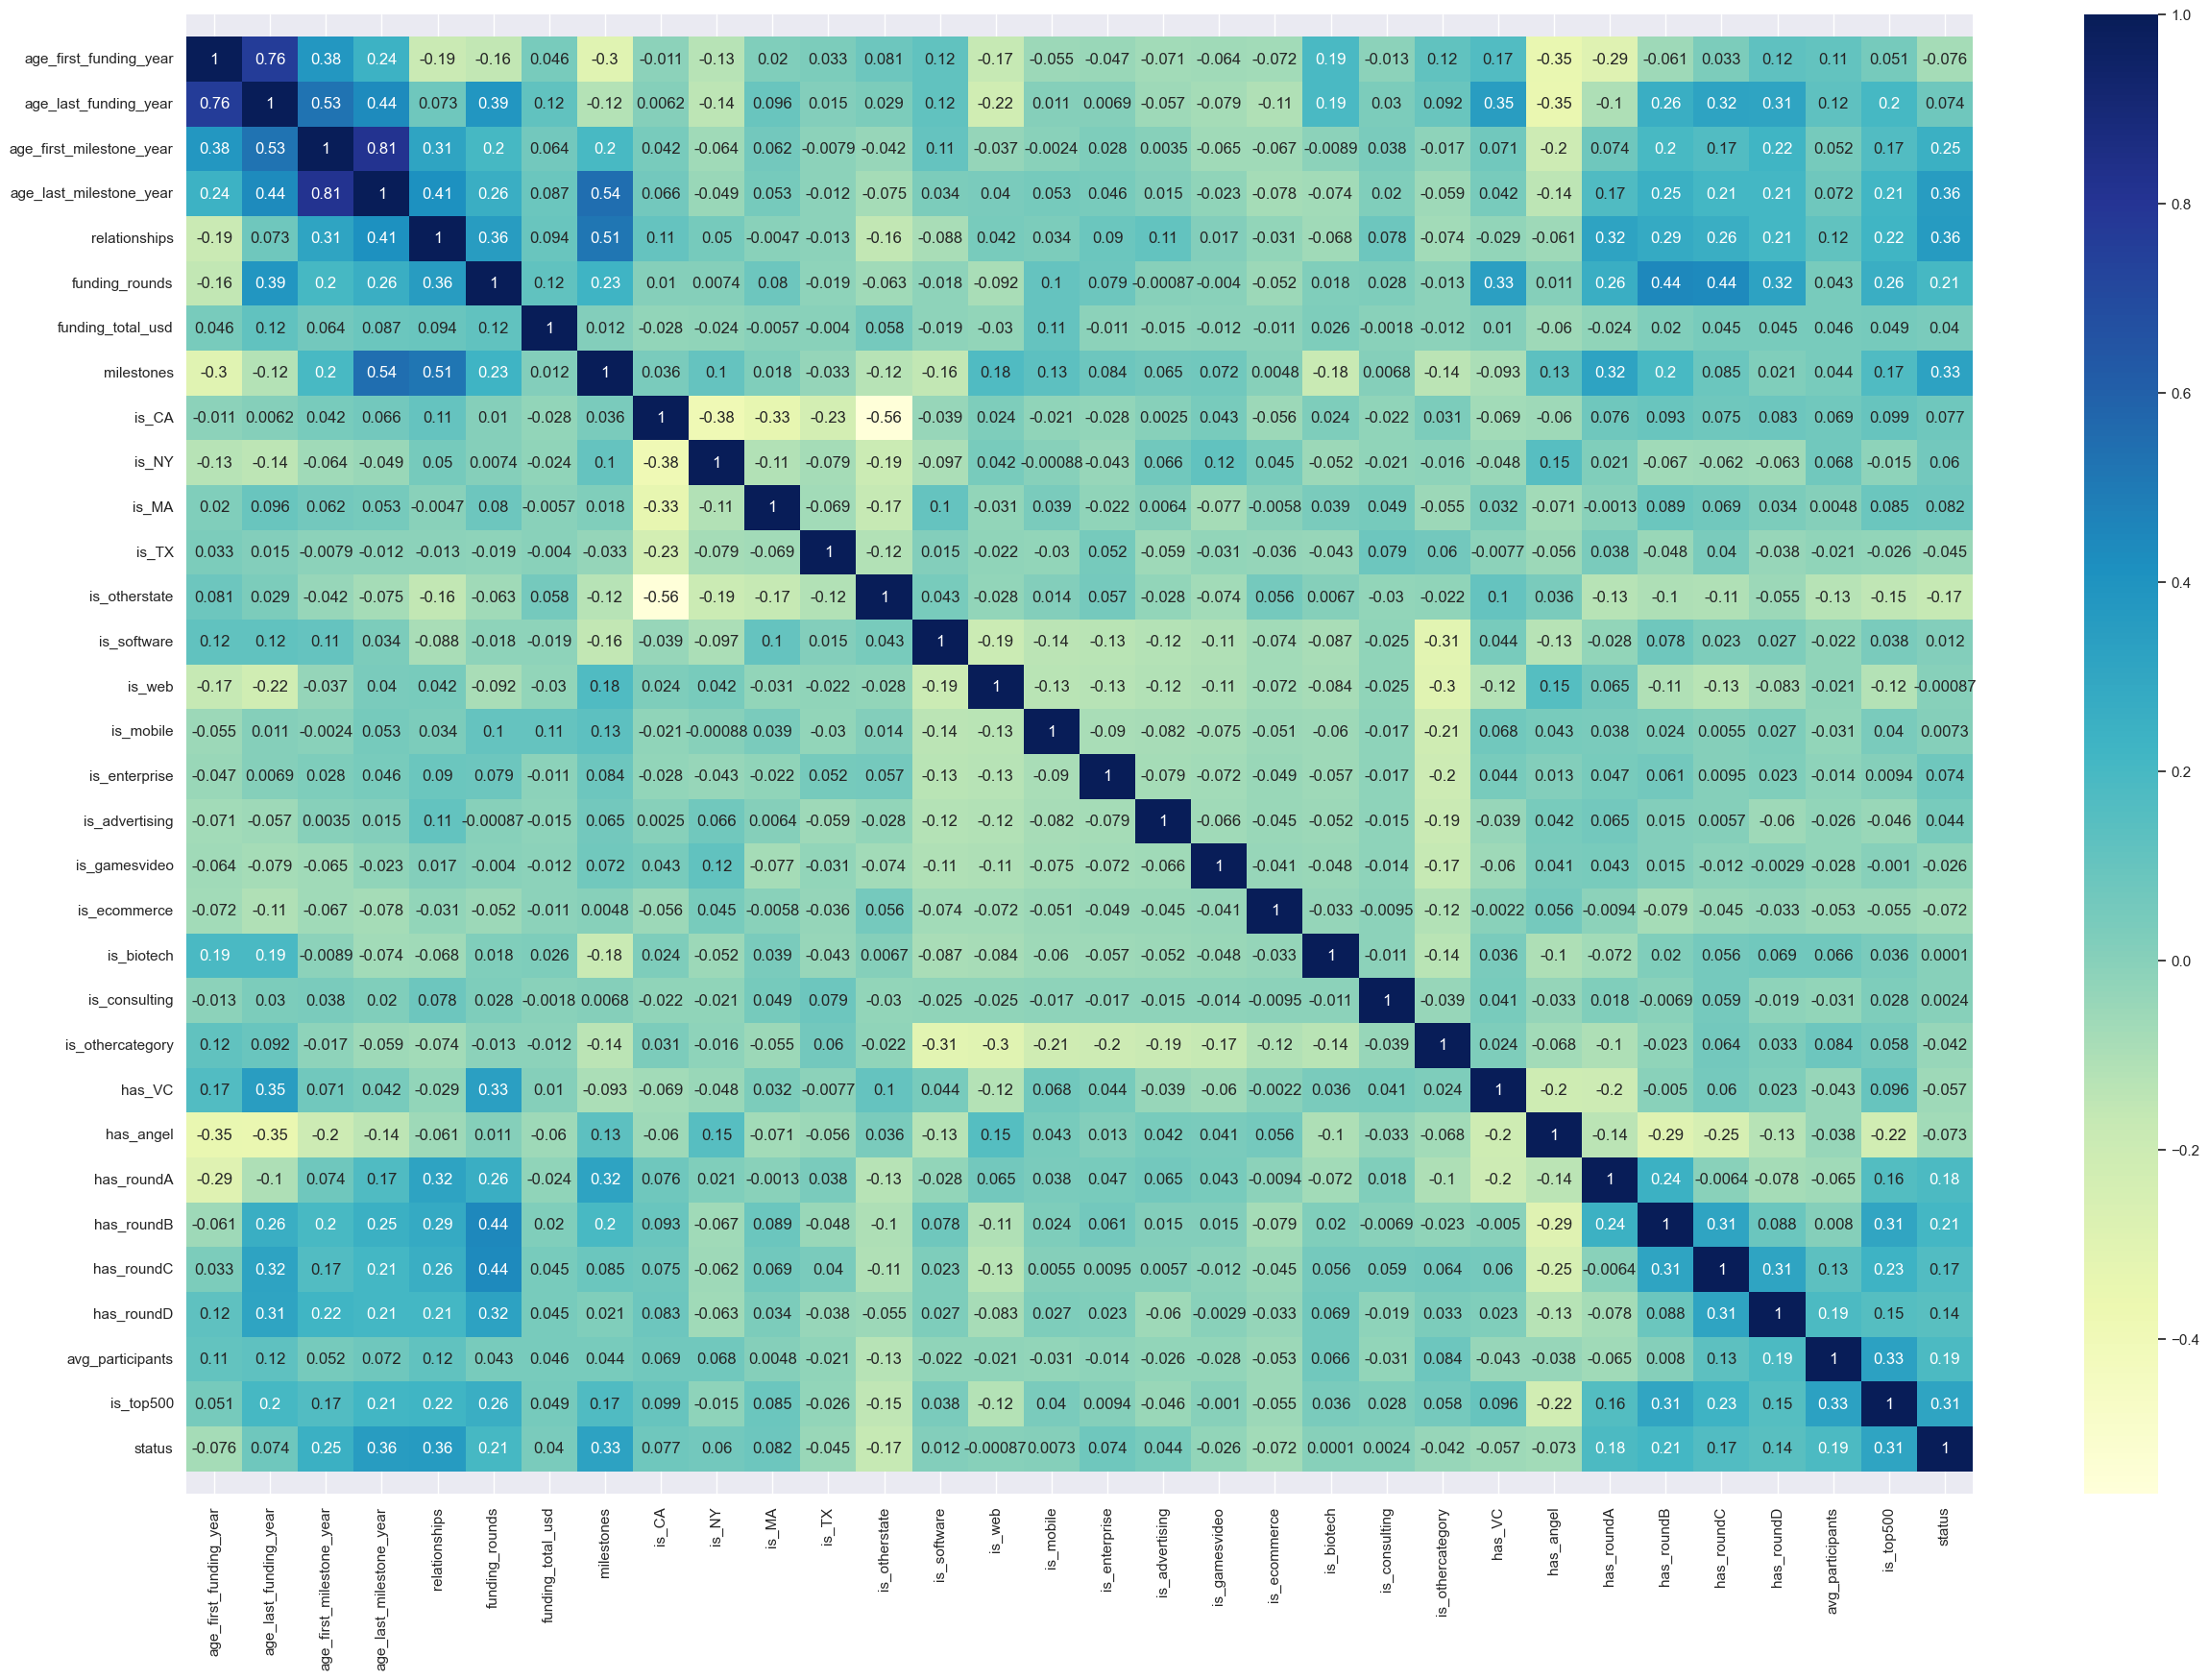

In [29]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']
print(len(features))

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

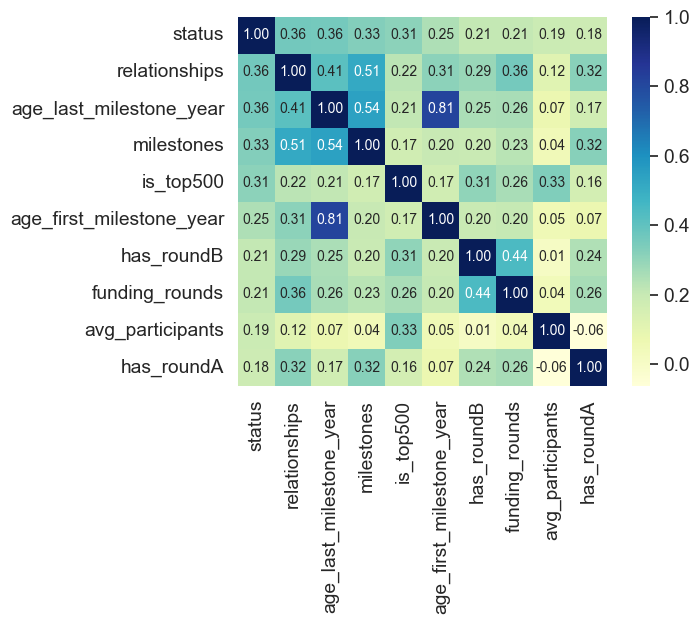

In [30]:
#number of variables for heatmap
cols = df[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plot

based on the correlation table above which says that **'views'** and **'likes'** are very positively correlated. then we then verify that by plotting a scatter plot between **'views'** and **'likes'** to visualize the relationship between those variables.

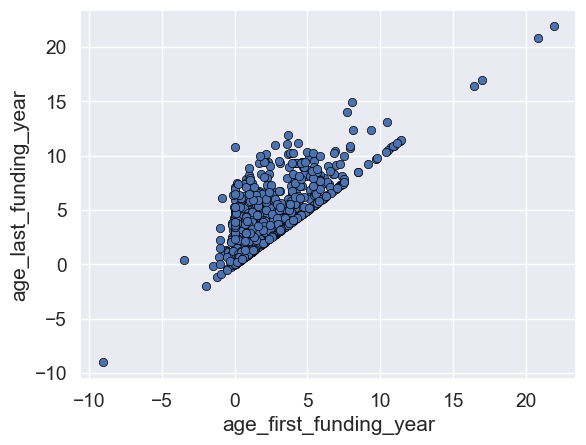

In [31]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

We see that **'age_first_milestones_year'** and **'age_last_milestones_year'** are really positively correlated whereas when one increases, the other also increases—mostly.

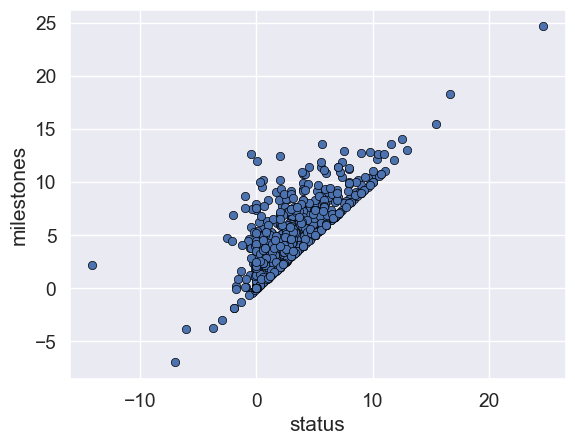

In [32]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_milestone_year'], y=df['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

### Box plots

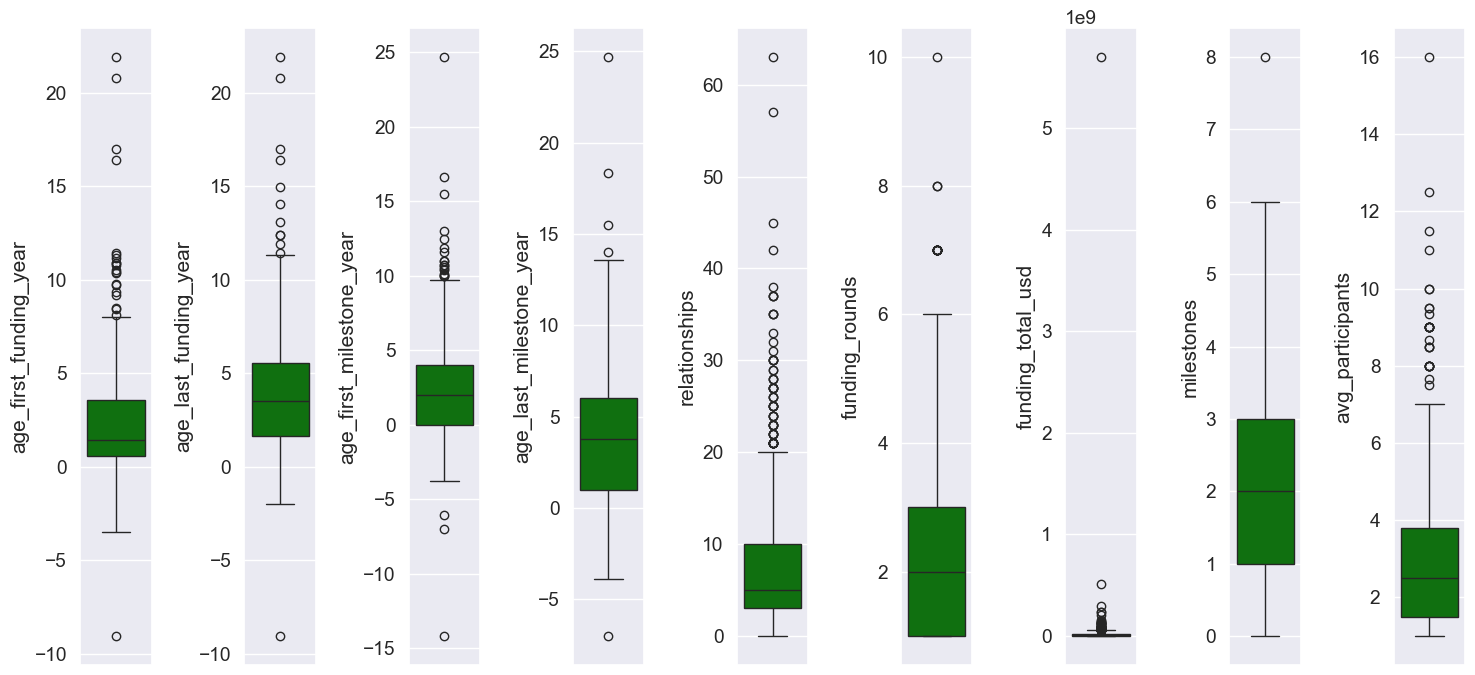

In [33]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

### Dataset collection founded years

In [34]:
# cdf = df["founded_at"].apply(lambda x: '' + x[:2]).value_counts() \
#             .to_frame().reset_index() \
#             .rename(columns={"index": "year", "founded_at": "No_of_startup"})

# fig, ax = plt.subplots()
# _ = sns.barplot(x="year", y="No_of_startup", data=cdf, 
#                 palette=sns.color_palette(['#003f5c', '#ffa600'], n_colors=7), ax=ax)
# _ = ax.set(xlabel="Year", ylabel="No. of startup")


In [35]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

founded_at
20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: count, dtype: int64

In [36]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

founded_at
20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: proportion, dtype: float64

total 563 startups or 60% of startups established in 2001

In [37]:
df["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

closed_at
20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:10    0.020585
20:3/    0.020585
20:11    0.020585
20:4/    0.019502
20:12    0.018418
20:9/    0.018418
Name: proportion, dtype: float64

from the total data available as many as 63% of startups are still standing while the remaining 37% have been closed and most closed in 2001.

### How many Startup are acquired or closed have?

In [38]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 47)

In [39]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 47)

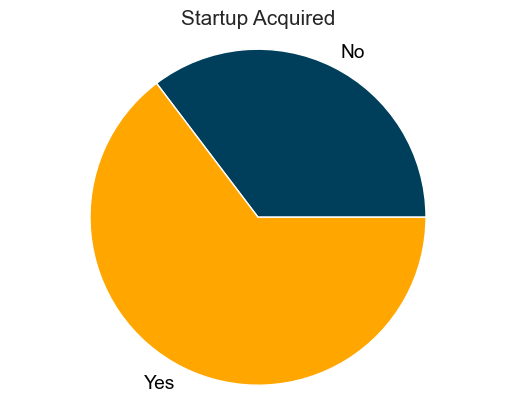

In [40]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

### Which category has the largest number of startup

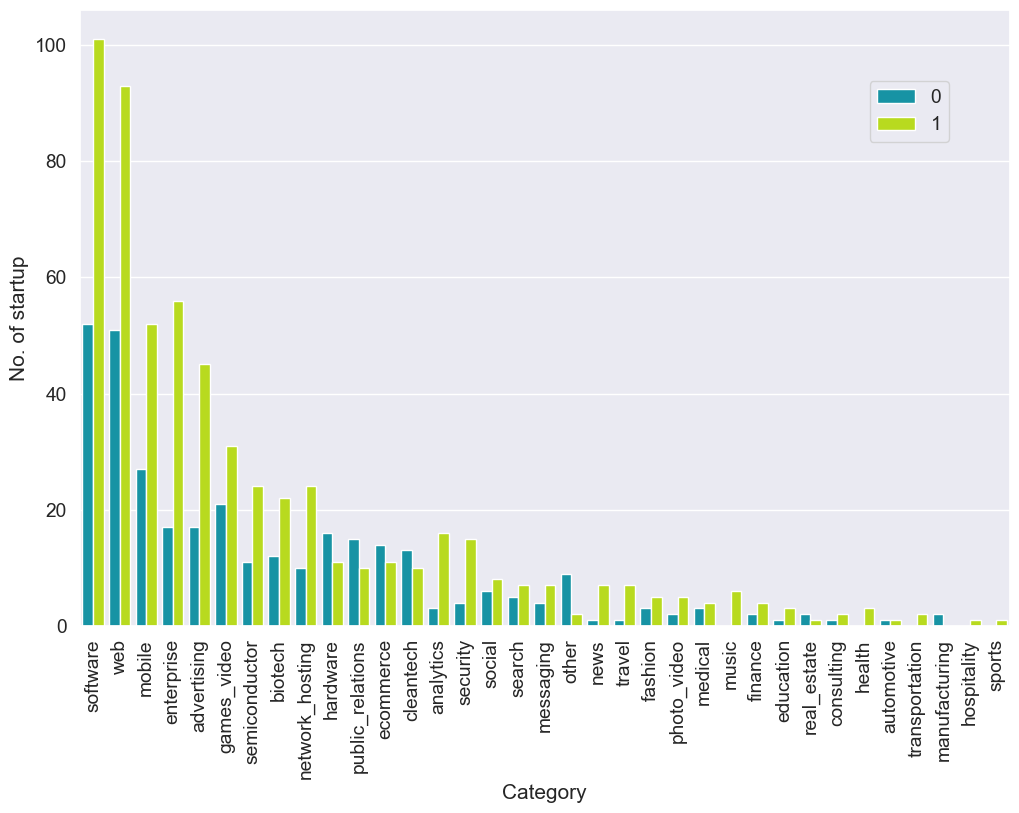

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Which category has the largest number Success Rate

In [42]:
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
17,news,7,1,8,87.50
27,travel,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


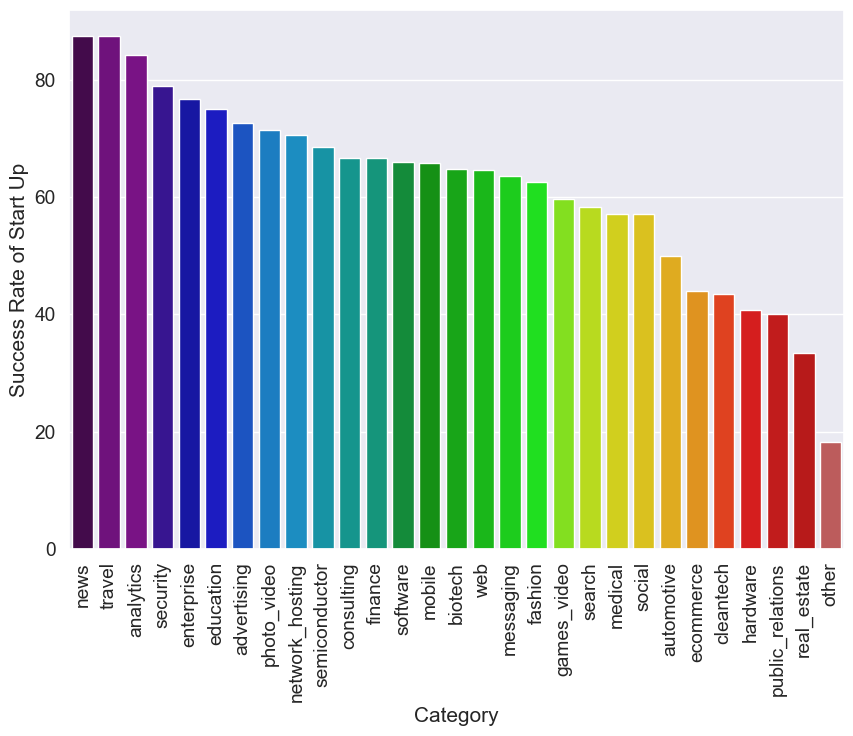

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

### Which category having most number of total funding

In [44]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


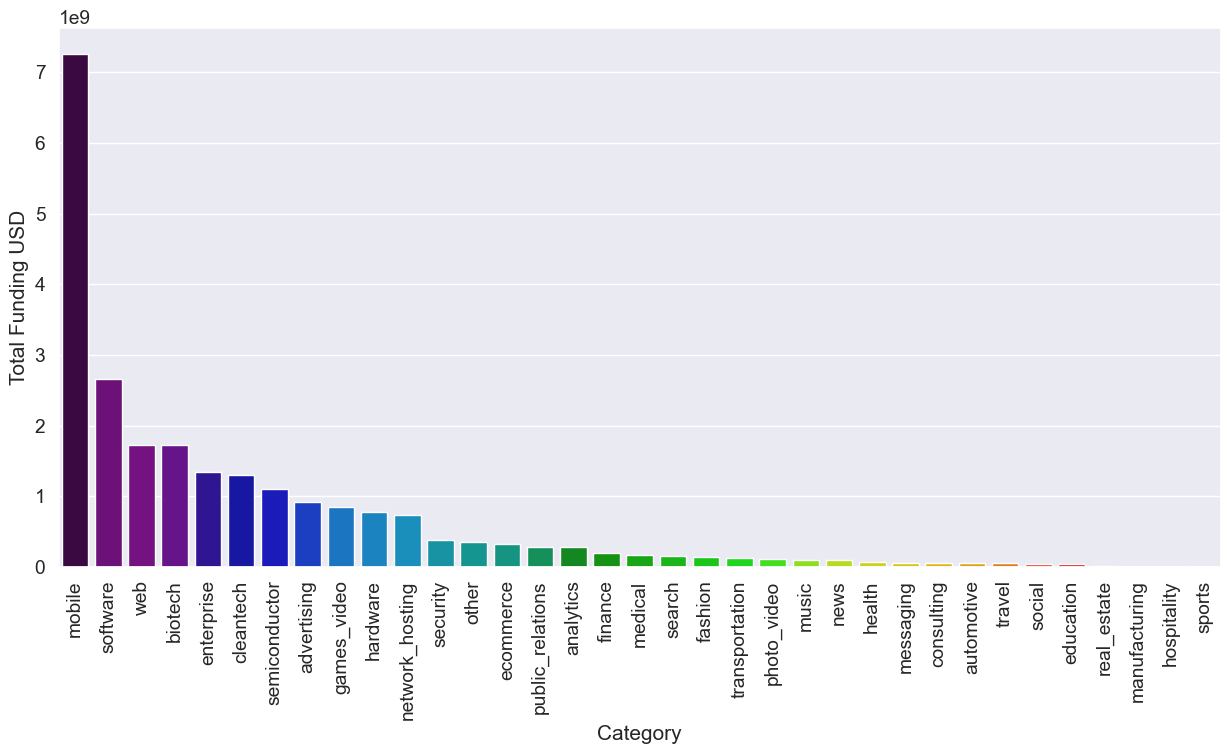

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

### Which State having most number of Startup

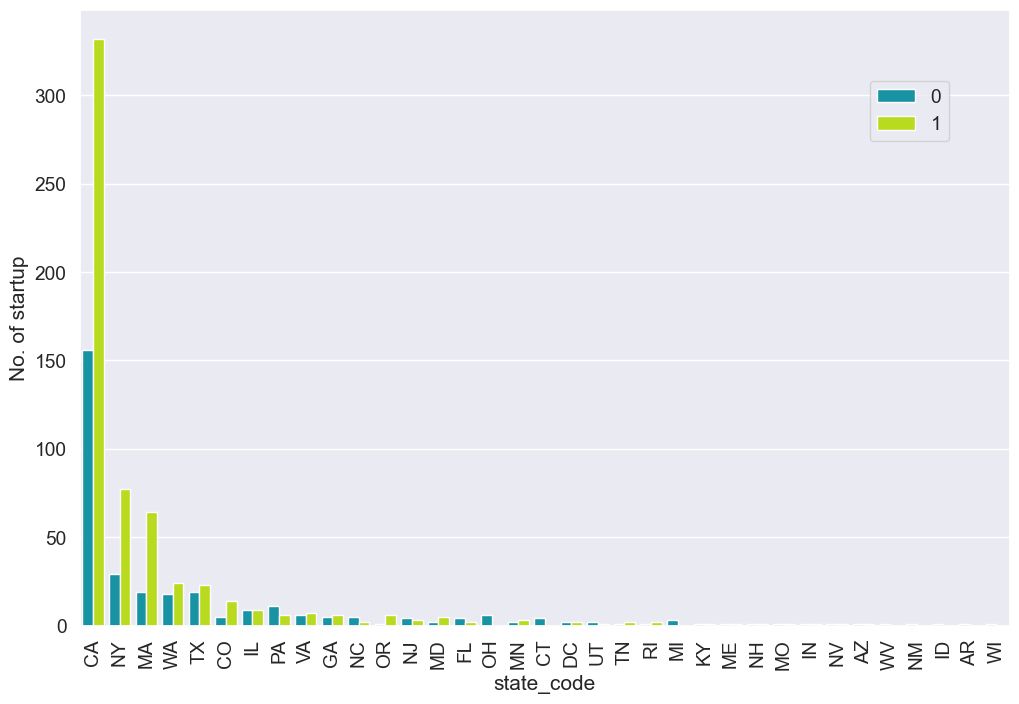

In [46]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [47]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
29,TX,42
32,WA,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


### Which State having most number of acquired Startup per category

In [48]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
136,TX,web,4
128,TX,enterprise,4
51,IL,software,4
37,CO,software,4
141,VA,web,2
140,VA,software,2


### Which State having most number of closed Startup per category

In [49]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,25
63,MA,software,8
95,NY,web,6
139,WA,web,5
123,TX,software,5
53,IL,web,3
41,FL,software,2
97,OH,ecommerce,2
45,GA,software,2
81,NJ,software,2


### Which city having most number of acquired Startup per category

In [50]:
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

,city,category_code,num_startup
275,San Francisco,web,26
195,New York,web,15
169,Mountain View,web,9
289,San Mateo,software,9
331,Sunnyvale,software,9
209,Palo Alto,software,7
300,Santa Clara,semiconductor,5
23,Austin,web,4
343,Waltham,software,4
58,Burlington,software,4


### Which city having most number of closed Startup per category

In [51]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
143,215,Santa Clara,software,5
139,200,San Jose,hardware,5
136,191,San Francisco,mobile,5
137,197,San Francisco,web,5
102,135,New York,games_video,5
107,150,Palo Alto,web,4
140,208,San Mateo,web,4
145,223,Seattle,web,3
11,12,Austin,enterprise,2
12,15,Austin,mobile,2


### Which city having most number of total funding

In [52]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
91,Kirkland,5718914576
174,San Francisco,1673487129
135,New York,1231405734
125,Mountain View,985553322
181,Santa Clara,839050274
176,San Jose,733181780
13,Austin,706317317
173,San Diego,614475001
163,Redwood City,521330100
110,Loveland,510000000


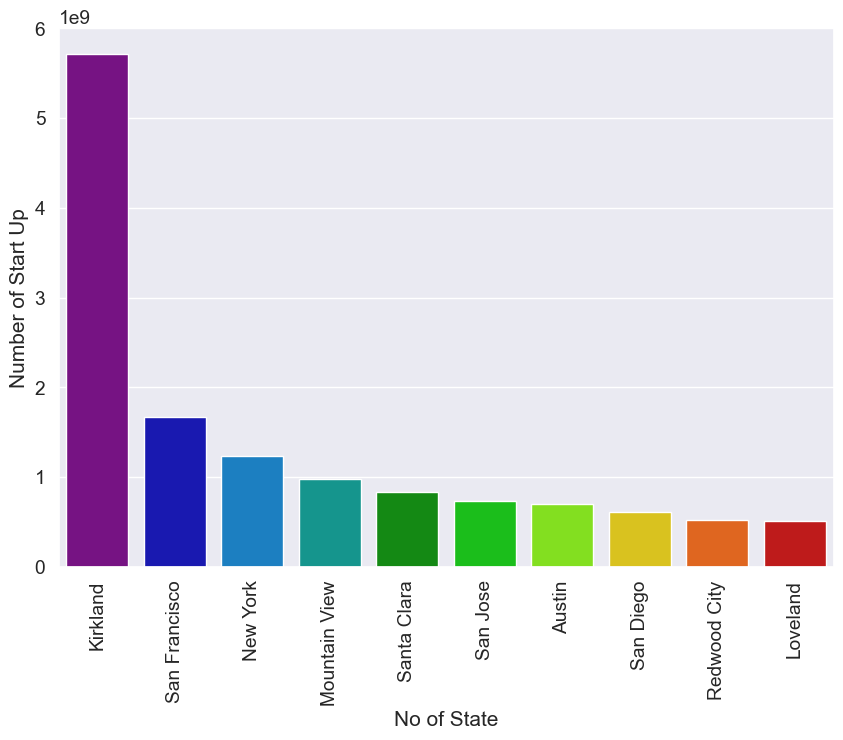

In [53]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="No of State", ylabel="Number of Start Up")

In [54]:
df_what_in_kirkland = df[(df["city"] == 'Kirkland')]
df_what_in_kirkland.shape

(2, 47)

In [55]:
df_what_in_kirkland.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
62,332,WA,47.675489,-122.191667,98033-6314,c:19861,Kirkland,Kirkland WA 98033-6314,SchemaLogic,1/1/2001,31/12/2013,1/17/2005,4/20/2010,4.0466,9.3041,6.0027,6.0027,2,5,18914576,1,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,c:19861,1,0,0,0,1,0,3.00,1,1
364,86,WA,30.632480,-86.984345,98033,c:13219,Kirkland,Kirkland WA 98033,Clearwire,10/1/2003,31/12/2013,5/6/2008,2/27/2013,4.6000,9.4164,5.2575,9.7753,19,4,5700000000,2,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:13219,0,0,0,0,0,0,4.25,1,1


Round A, Round B,Round C, Round D, VC, Angel = 0 earlier startup status acquired ????????? there is something strange about this data, the possibility of invalid data

### How many Startup have has_VC?

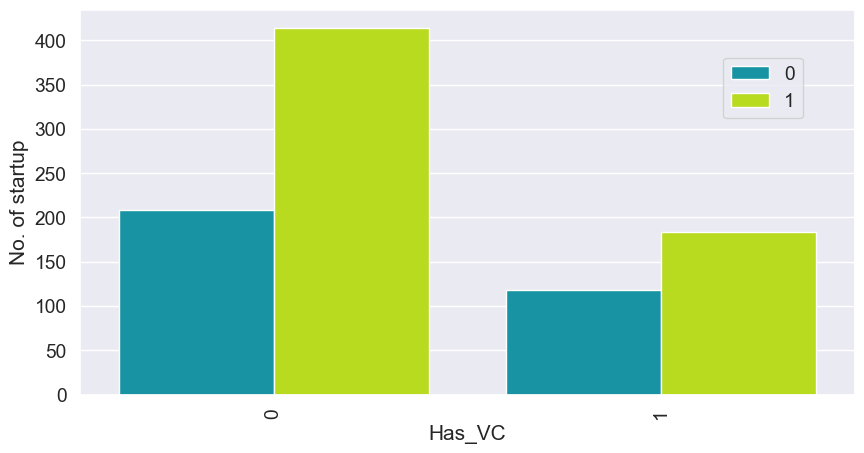

In [56]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### How many Startup have is_top500?

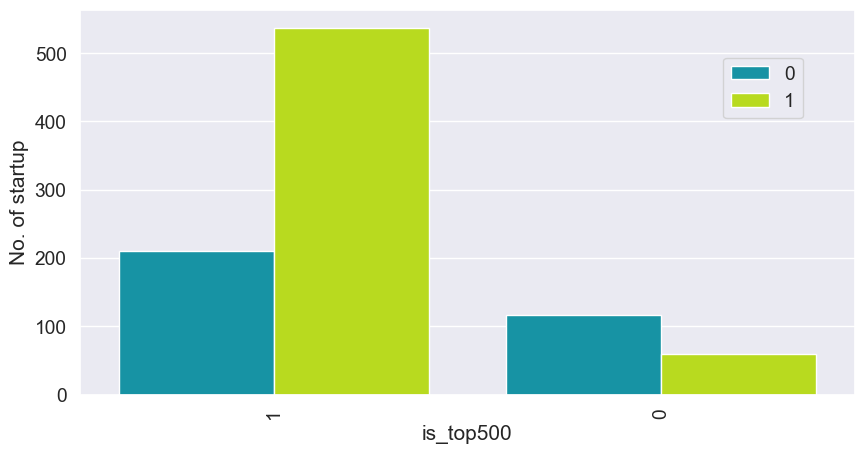

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [58]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["status"] == True) & (df["is_top500"] == True)].index)

537

In [59]:
#How many Startup have both 'closed' status and is_top500?
len(df[(df["status"] == False) & (df["is_top500"] == False)].index)

116

In [60]:
df_acquired["is_top500"].value_counts(normalize=True)

is_top500
1    0.899497
0    0.100503
Name: proportion, dtype: float64

### How many years on average the company closes

In [61]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

In [62]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [63]:
#df_closed['age_closed_startup'] = pd.to_numeric(df['age_closed_startup'].dt.days, downcast='int64')

In [64]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
11   2161 days
12   3039 days
15   4104 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [65]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [66]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.00,1,0,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.00,1,0,2602 days,7.128767
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,2006-01-01,2011-12-02,2/1/2007,5/3/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:4829,1,1,1,0,0,0,1.75,1,0,2161 days,5.920548


In [67]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2184 days 17:13:37.177914112')

In [68]:
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


### which relationship related to acquired or closed startup?

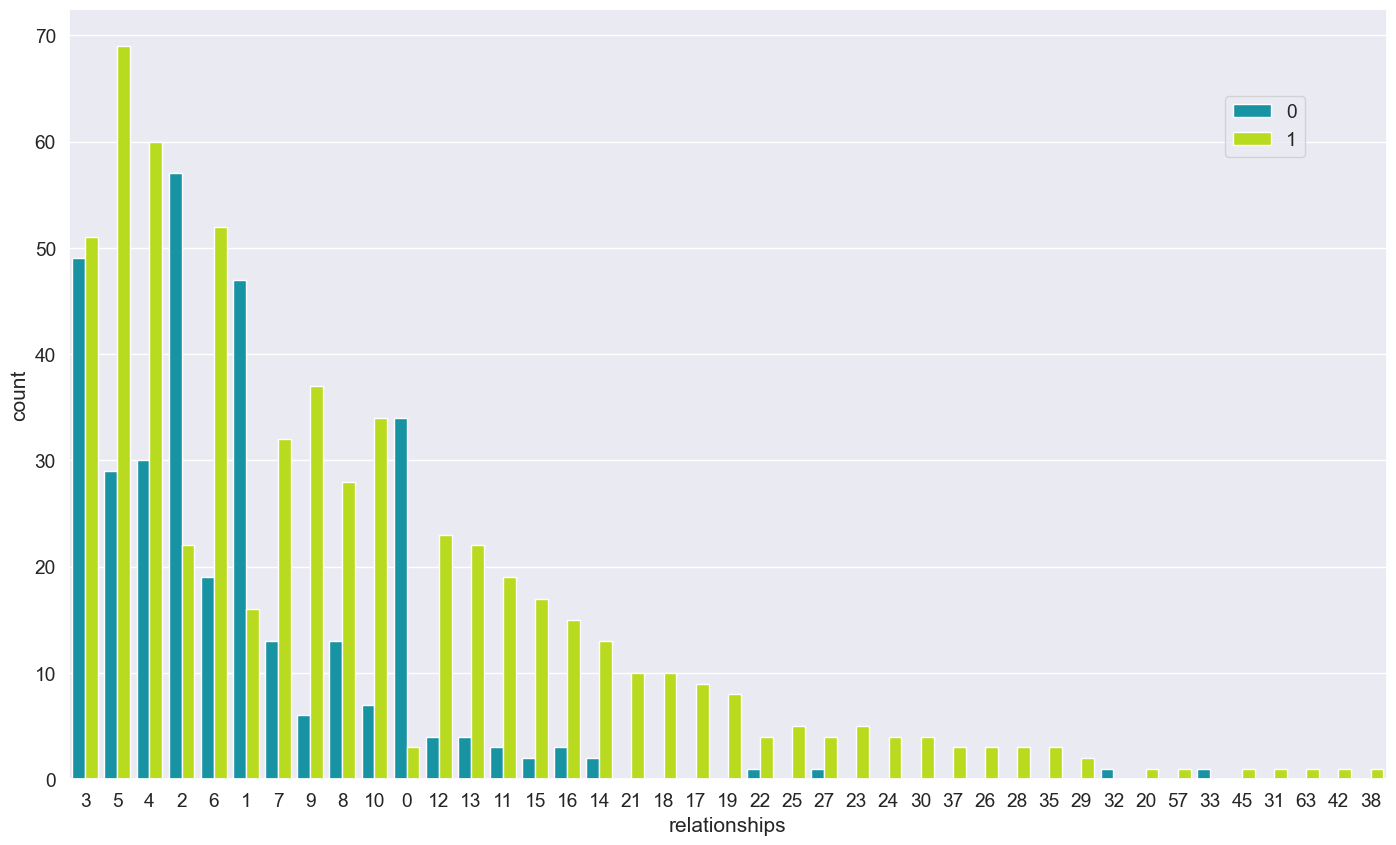

In [69]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

### which funding_rounds related to acquired or closed startup?

<Axes: xlabel='funding_rounds', ylabel='count'>

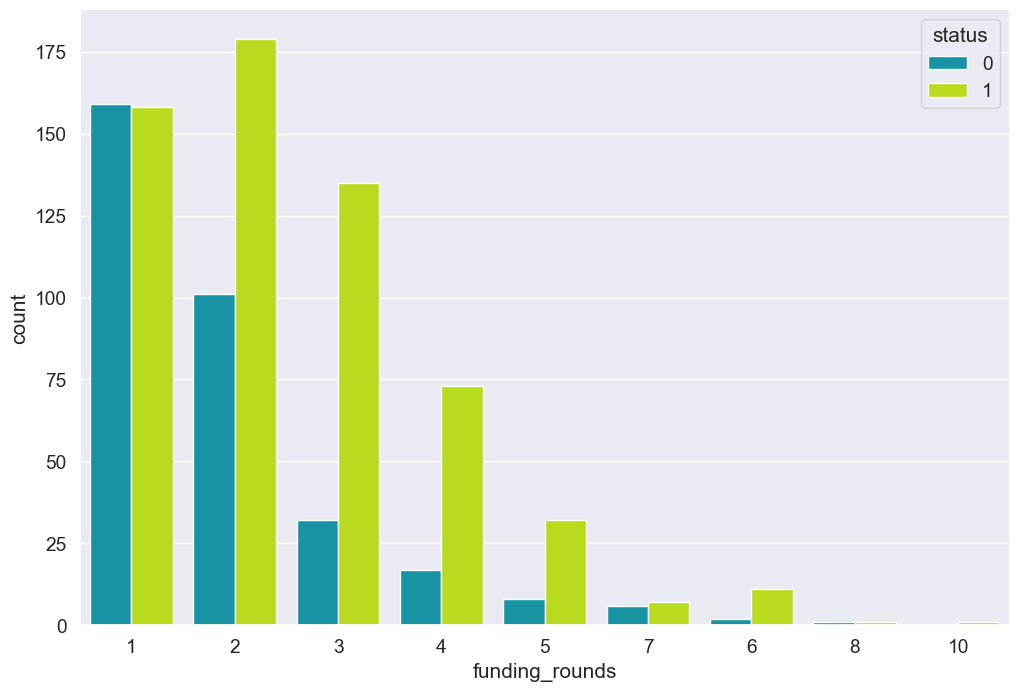

In [70]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

### Investing Feature on Acquired

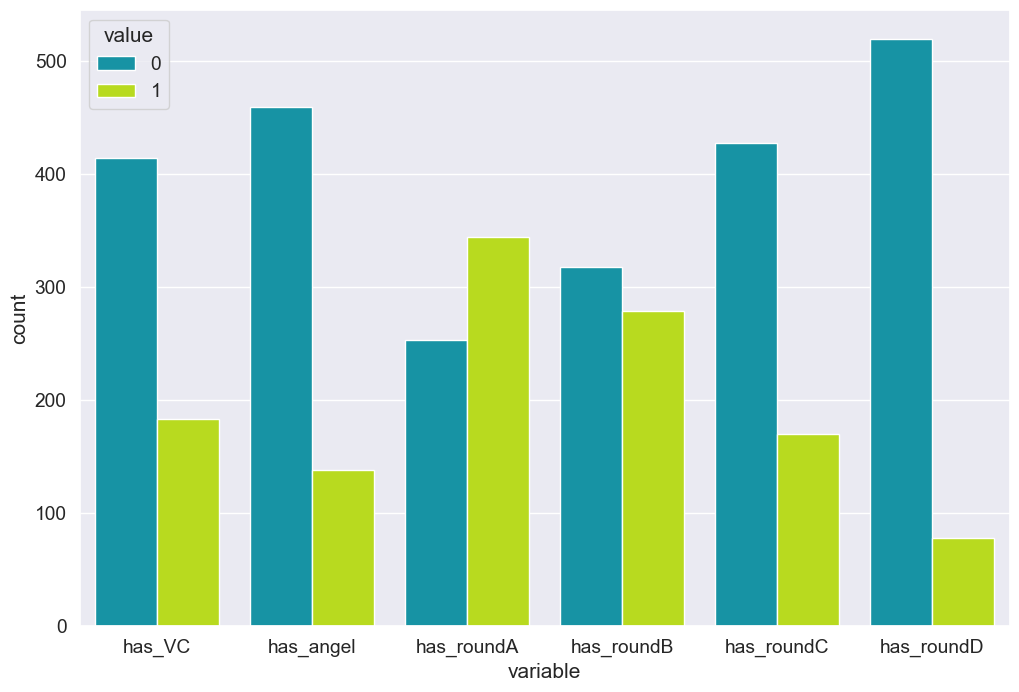

In [71]:
coba = df[(df["status"] == 1)]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

# Data Preprocessing

## Duplicate Values

In [72]:
#check
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


## Negative value

In [73]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]


for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [74]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [75]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


## Outliers

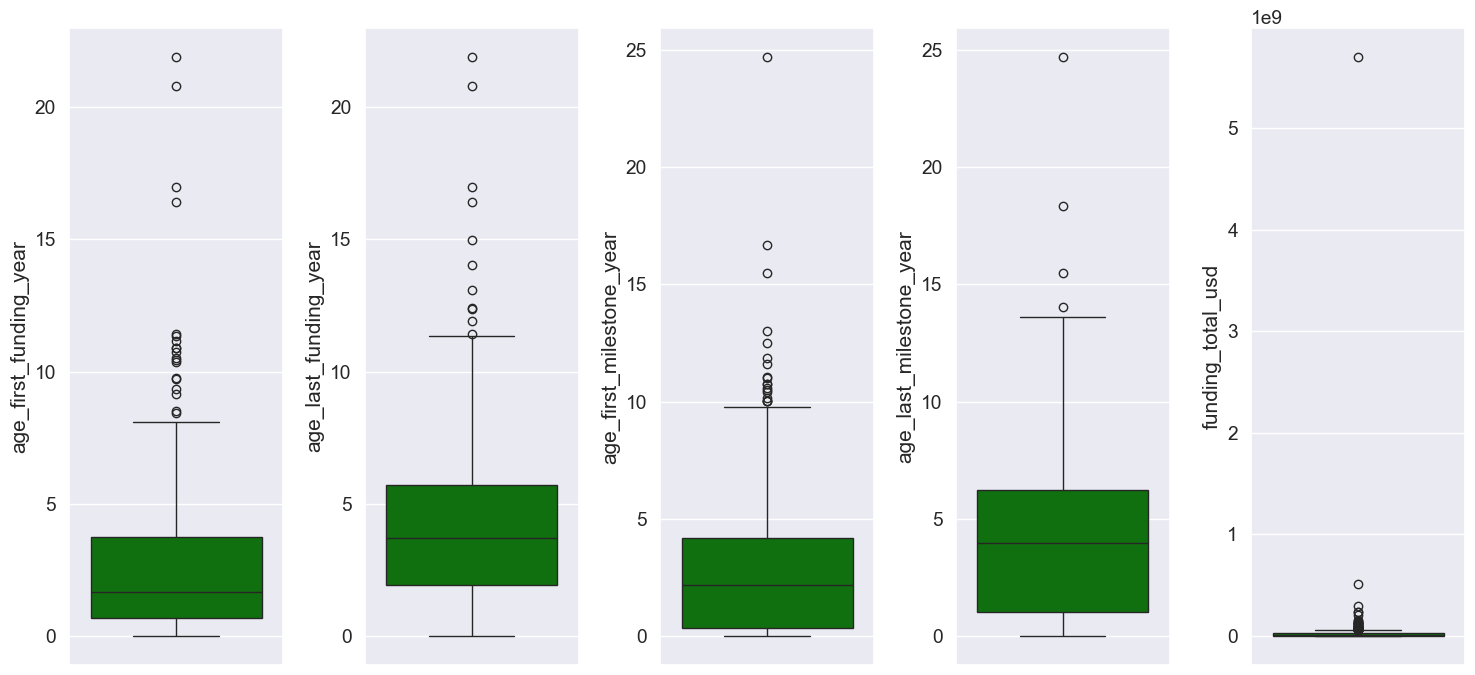

In [76]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Log-transformation of the funding and milestone year variable

In [77]:
# Here we used log transformation to remove the outliers

df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

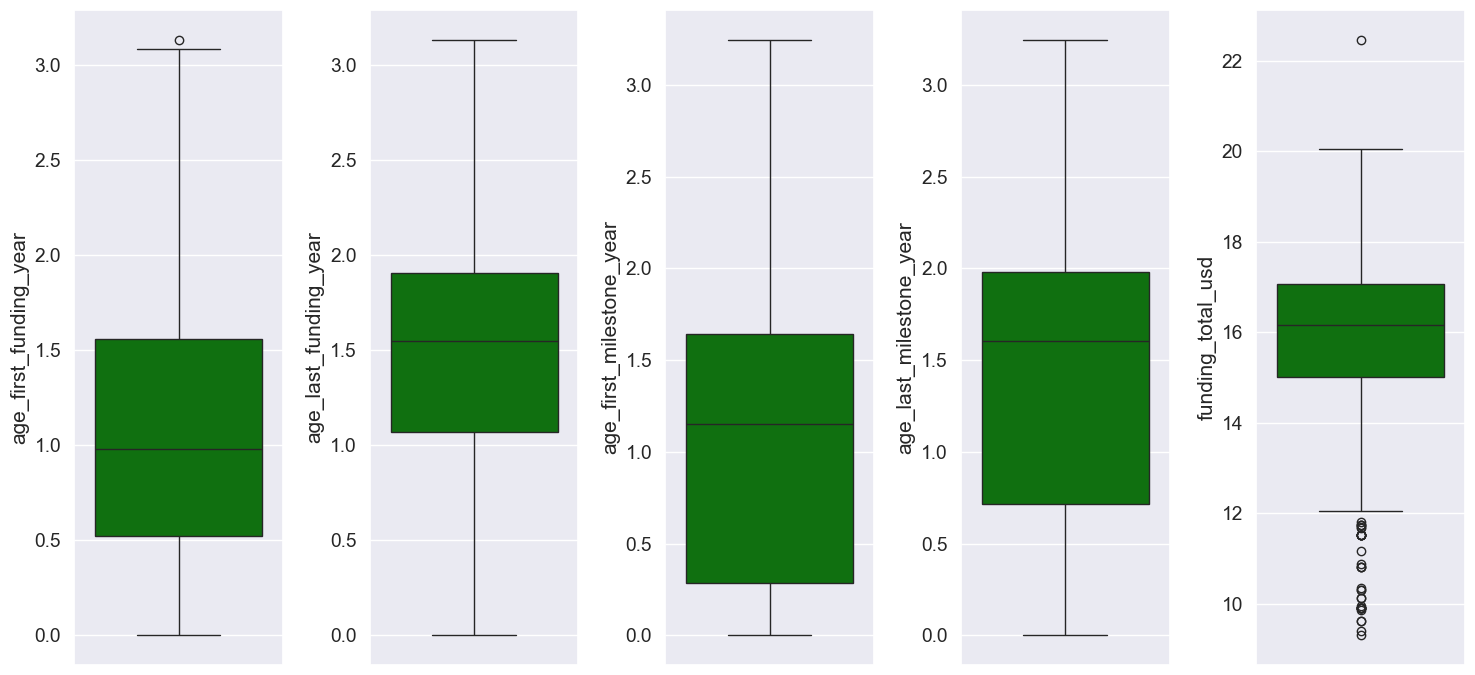

In [78]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

# Feature Engineering

## New Column "has_RoundABCD"

In [79]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0


## New Column "has_Investor"

In [80]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1


In [81]:
len(df[(df["has_RoundABCD"] == 1)].index)

636

In [82]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

459

In [83]:
len(df)

840

In [84]:
923-490

433

## New Column "has_Seed"

In [85]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1


In [86]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
82      True
83     False
84     False

In [87]:
len(df[(df["has_Seed"] == 1)].index)


179

## New Column "invalid_startup"

In [88]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0


In [89]:
len(df[(df["invalid_startup"] == 1)].index)

25

##  New Column "age_startup_year"

In [90]:
df.founded_at=pd.to_datetime(df.founded_at)
# df.closed_at=pd.to_datetime(df.closed_at)
df.closed_at = pd.to_datetime(df.closed_at, format='mixed', dayfirst=False)



In [91]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [92]:
df['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [93]:
df['age_startup_year'] = df['age_closed_startup'].dt.days /365
df["age_startup_year"]

0       7.002740
1      14.008219
2       4.791781
3      12.005479
4       2.169863
5       7.128767
6       9.002740
7      10.005479
8      12.005479
9       8.589041
10     13.134247
12      8.326027
13      6.101370
14     13.005479
15     11.243836
16      9.731507
18      4.000000
19      4.693151
20     13.005479
21      7.745205
22      6.567123
24      2.758904
25     12.005479
26     11.005479
27      5.586301
28      6.673973
29      8.610959
30      5.873973
31     13.005479
33      3.000000
34      2.989041
35      4.254795
36      4.076712
37      8.419178
38      5.252055
39      7.841096
40      7.673973
41      2.419178
42      3.126027
43      9.646575
44     12.005479
45     11.005479
46      4.084932
47      4.208219
48      3.608219
49     11.257534
50      8.002740
51      5.000000
52      9.169863
53     14.008219
54      7.673973
55      5.005479
56      8.002740
57      8.917808
58      6.506849
59     13.509589
61      6.572603
62     13.005479
63     11.7561

##  New Column "tier_relationships"

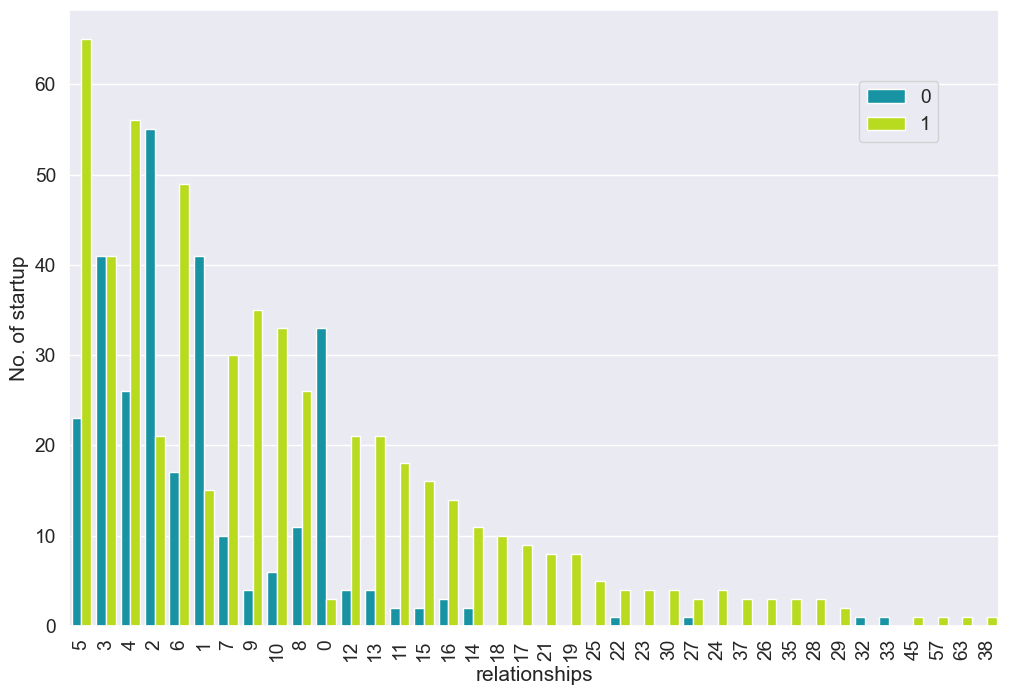

In [94]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [95]:
# create a list of our conditions
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = [4,3,2,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier_relationships'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,age_startup_year,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0,2556 days,7.002740,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,5113 days,14.008219,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,1749 days,4.791781,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,4382 days,12.005479,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0,792 days,2.169863,4


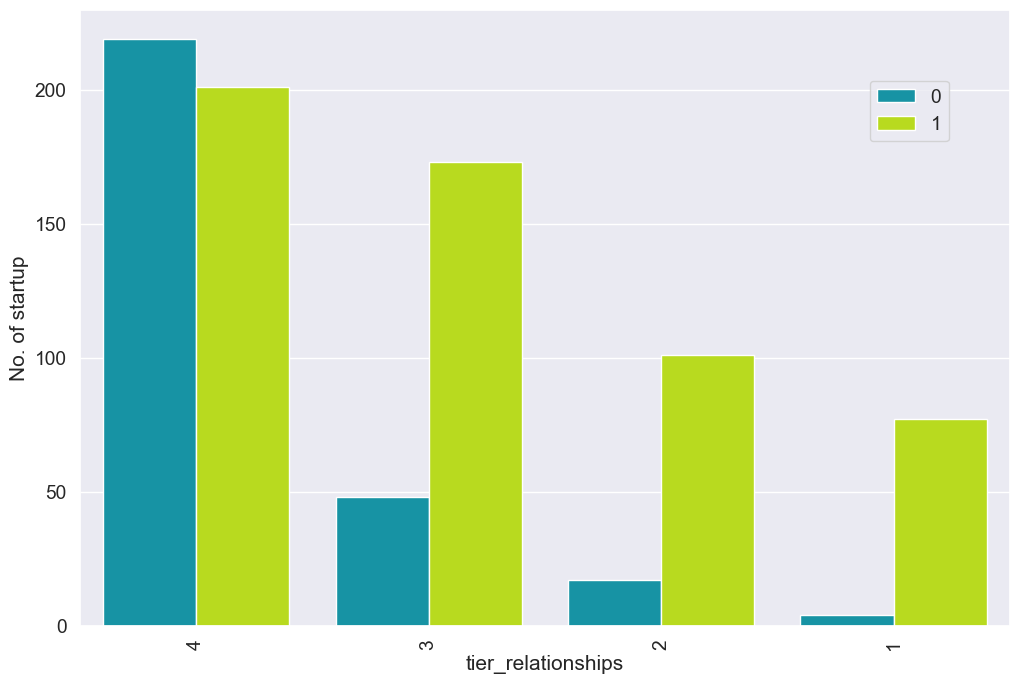

In [96]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [97]:
df['tier_relationships'] = df.tier_relationships.astype(int)

## Drop unused column for modelling

In [98]:
df = df.drop(['state_code'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['age_closed_startup'],axis=1)
df = df.drop(['relationships'],axis=1)

# Modeling

In [99]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [100]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 36)
Shape of the y Train : (672,)
Shape of the X test : (168, 36)
Shape of the y test : (168,)


In [103]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## XGBoost Classifier

In [104]:
# pip install xgboost

Training Accuracy : 1.0
Testing Accuracy : 0.8809523809523809


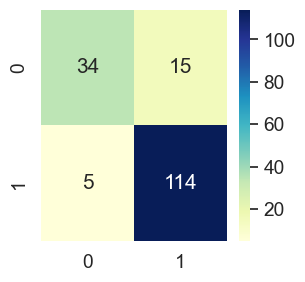

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        49
           1       0.88      0.96      0.92       119

    accuracy                           0.88       168
   macro avg       0.88      0.83      0.85       168
weighted avg       0.88      0.88      0.88       168

------------------------------------------
ROC Curves              = 0.8259303721488596
Precision-Recall Curves = 0.9357330141358868


In [105]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

# i want to save this model 

## GradientBoosting Classifier

In [106]:
import joblib


joblib.dump(xgb, 'xgboost_model.joblib')

print("XGBoost model has been saved as 'xgboost_model.joblib'")

XGBoost model has been saved as 'xgboost_model.joblib'


Training Accuracy : 1.0
Testing Accuracy : 0.875


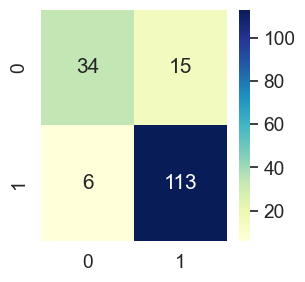

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        49
           1       0.88      0.95      0.91       119

    accuracy                           0.88       168
   macro avg       0.87      0.82      0.84       168
weighted avg       0.87      0.88      0.87       168

------------------------------------------
ROC Curves              = 0.8217286914765906
Precision-Recall Curves = 0.9340533088235293


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

## AdaBoost Classifier

Training Accuracy : 0.8318452380952381
Testing Accuracy : 0.8511904761904762


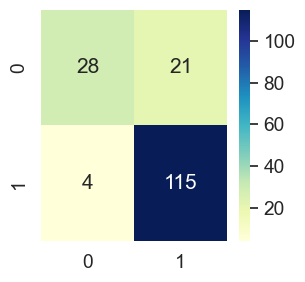

              precision    recall  f1-score   support

           0       0.88      0.57      0.69        49
           1       0.85      0.97      0.90       119

    accuracy                           0.85       168
   macro avg       0.86      0.77      0.80       168
weighted avg       0.85      0.85      0.84       168

roc_auc 0.76890756302521
------------------------------------------
ROC Curves              = 0.76890756302521
Precision-Recall Curves = 0.9178921568627452


In [108]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.8333333333333334


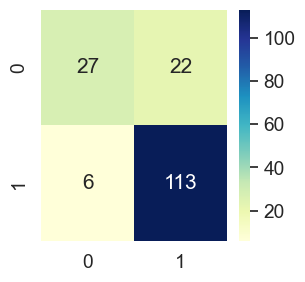

              precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.84      0.95      0.89       119

    accuracy                           0.83       168
   macro avg       0.83      0.75      0.77       168
weighted avg       0.83      0.83      0.82       168

------------------------------------------
ROC Curves              = 0.750300120048019
Precision-Recall Curves = 0.911165577342048


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

# Summary

In [110]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {        
                 'GradientBoosting Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'XGBoost':  { 
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }

In [111]:
from sklearn.metrics import precision_score


Precision_Recall = {
    
                 'GradientBoosting Classifier':  { 
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  { 
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'XGBoost':  { 
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  { 
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }

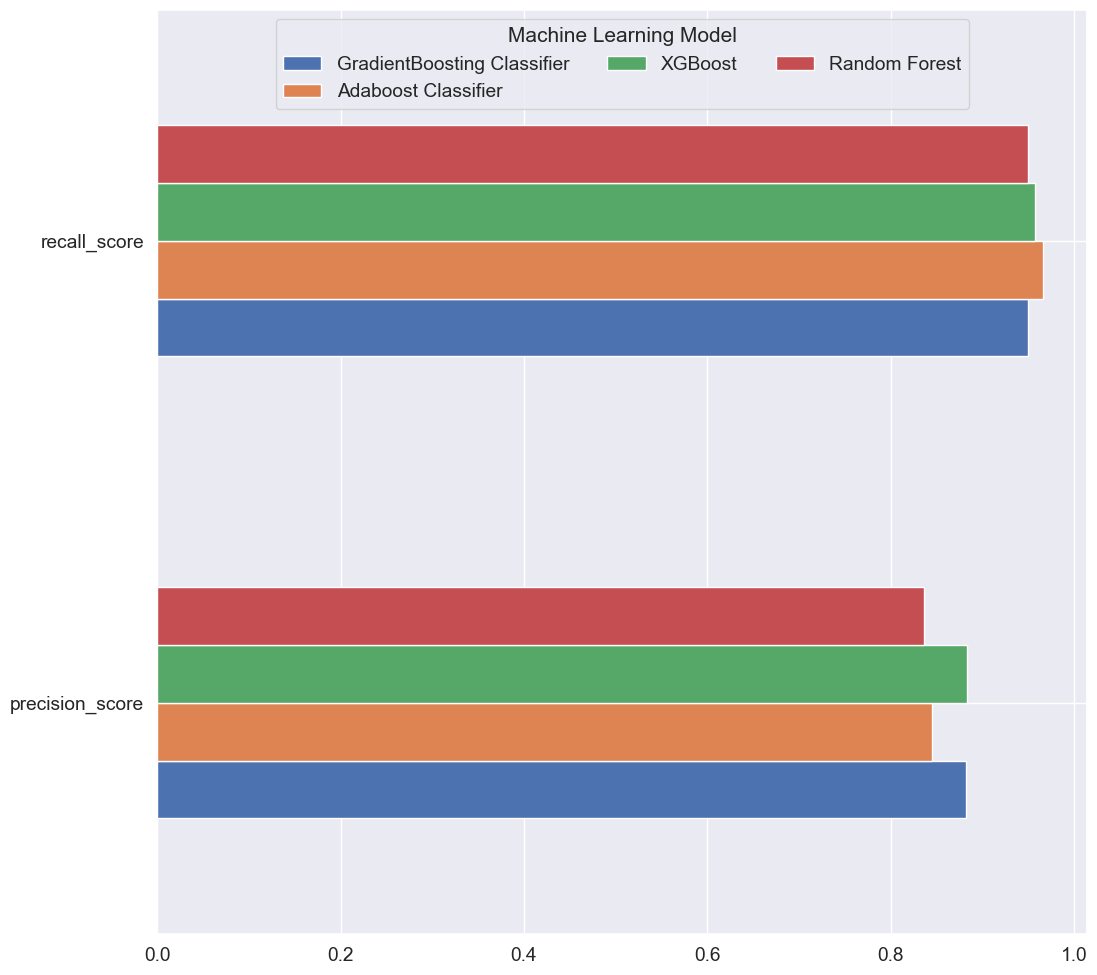

In [112]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

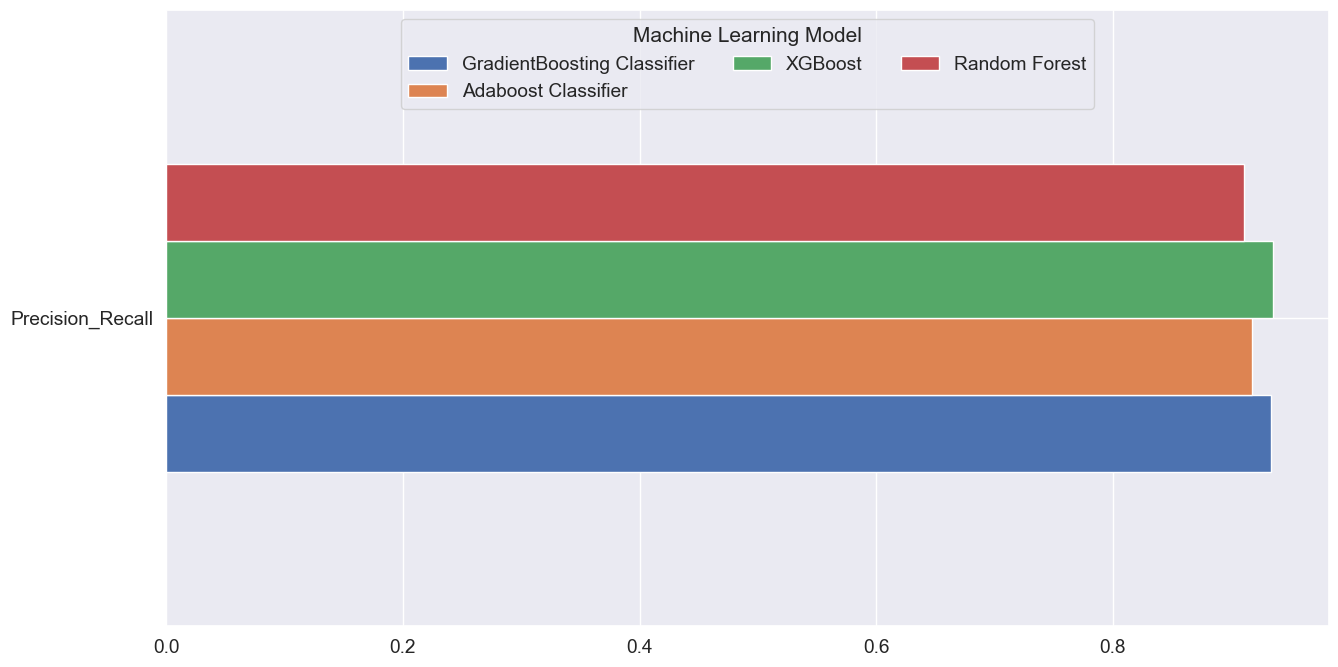

In [114]:
Precision_Recall = pd.DataFrame(Precision_Recall)


Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

In [120]:
X_train.head(1).shape


(1, 36)